In [1]:
import pandas as pd
file_path = '/content/Day5_OffSpecSmoothSlice_Off_Off_Qz_0.04-0.065.csv'
df = pd.read_csv(file_path, sep='\s+', header=None)  # '\s+' is a regex for one or more spaces
Qz = df.iloc[:, 0]
I = df.iloc[:, 1]
print("First few entries of Qz[1/A]:\n", Qz.head())
print("First few entries of I[a.u.]:\n", I.head())


First few entries of Qz[1/A]:
 0   -0.030000
1   -0.029643
2   -0.029286
3   -0.028929
4   -0.028571
Name: 0, dtype: float64
First few entries of I[a.u.]:
 0    0.000048
1    0.000049
2    0.000051
3    0.000051
4    0.000051
Name: 1, dtype: float64


In [2]:



min_qz = Qz.min()
min_i = I.min()

print("Minimum Qz value:", min_qz)
print("Minimum I value:", min_i)


Minimum Qz value: -0.03
Minimum I value: 2.063819e-05


In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


In [4]:
# Define dataframe for dataset

df = pd.DataFrame({
  'Qz [1/A]': Qz,
  'I [a.u.]': I
})


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# Assuming 'Qz' and 'I' are columns in df
# First, let's check if the columns exist to avoid KeyError
if 'Qz' in df.columns and 'I' in df.columns:
    # Calculate the correlation coefficient between Qz and I
    correlation = df['Qz'].corr(df['I'])
    print("Correlation coefficient between Qz and I:", correlation)

    # Calculate the covariance between Qz and I
    covariance = df['Qz'].cov(df['I'])
    print("Covariance between Qz and I:", covariance)

    # Perform linear regression to find the relationship between Qz and I
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['Qz'], df['I'])

    # Print the results of the linear regression
    print("Slope:", slope)
    print("Intercept:", intercept)
    print("R-squared value:", r_value**2)
    print("P-value:", p_value)
    print("Standard error:", std_err)

    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Qz'], df['I'], color='blue', label='Data points')  # Use scatter for data points
    plt.plot(df['Qz'], slope * df['Qz'] + intercept, color='red', label='Regression line')  # Regression line
    plt.title('Intensity vs. Qz')
    plt.xlabel('Qz [1/A]')
    plt.ylabel('Intensity [a.u.]')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Qz' and/or 'I' not found in the DataFrame.")


Columns 'Qz' and/or 'I' not found in the DataFrame.


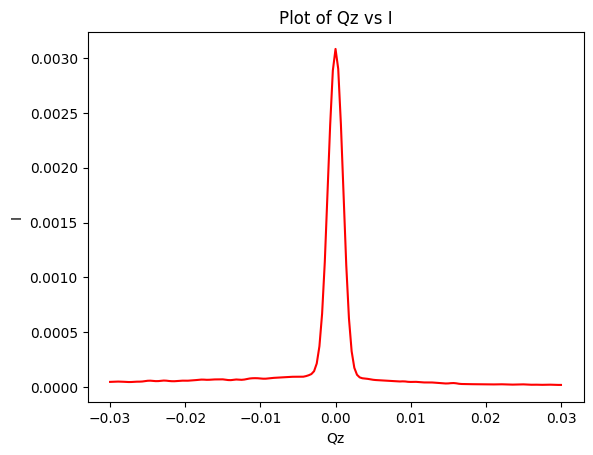

In [6]:
# subplot for Qz and I


import matplotlib.pyplot as plt



fig, ax = plt.subplots(1, 1)
ax.plot(Qz, I, color='red')
ax.set_xlabel('Qz')
ax.set_ylabel('I')
ax.set_title('Plot of Qz vs I')
plt.show()

In [7]:
Qz.describe()


count    169.000000
mean       0.000000
std        0.017475
min       -0.030000
25%       -0.015000
50%        0.000000
75%        0.015000
max        0.030000
Name: 0, dtype: float64

In [8]:
I.describe()

count    169.000000
mean       0.000179
std        0.000504
min        0.000021
25%        0.000035
50%        0.000057
75%        0.000077
max        0.003083
Name: 1, dtype: float64

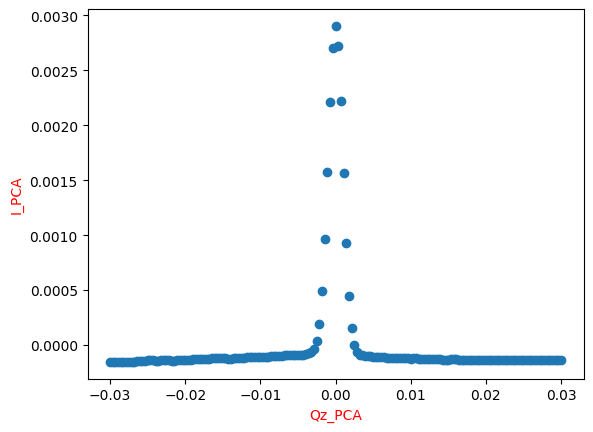

In [9]:
# PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

Qz_pca = pca.transform(df)[:, 0]
I_pca = pca.transform(df)[:, 1]

plt.scatter(Qz_pca, I_pca)
plt.xlabel("Qz_PCA",color = 'red')
plt.ylabel("I_PCA",color = 'red')
plt.show()

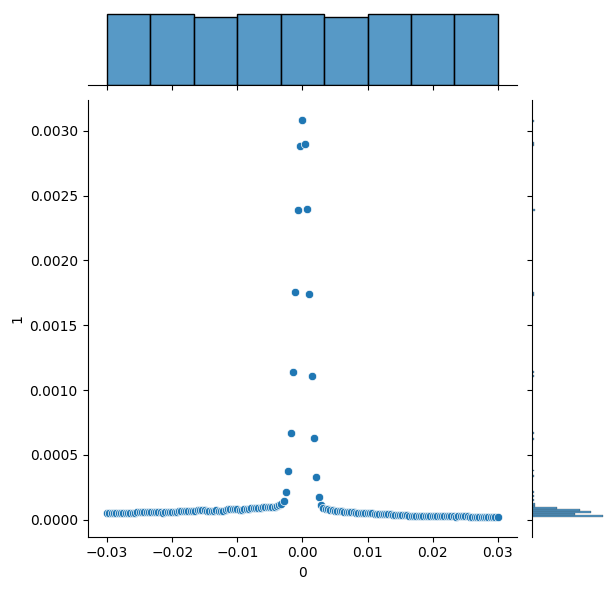

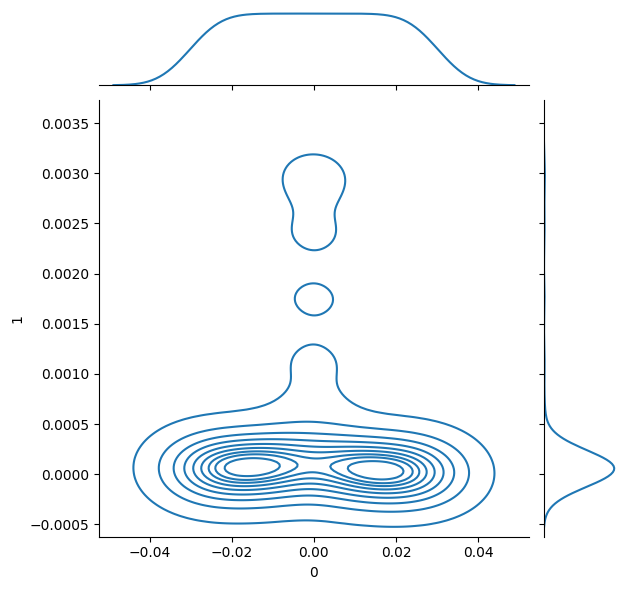

In [10]:
# Distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

# Joint distribution plot
sns.jointplot(x=Qz, y=I, kind='scatter')
plt.show()

# For a version with both the scatter plot and the KDE, use kind='kde'
sns.jointplot(x=Qz, y=I, kind='kde')
plt.show()


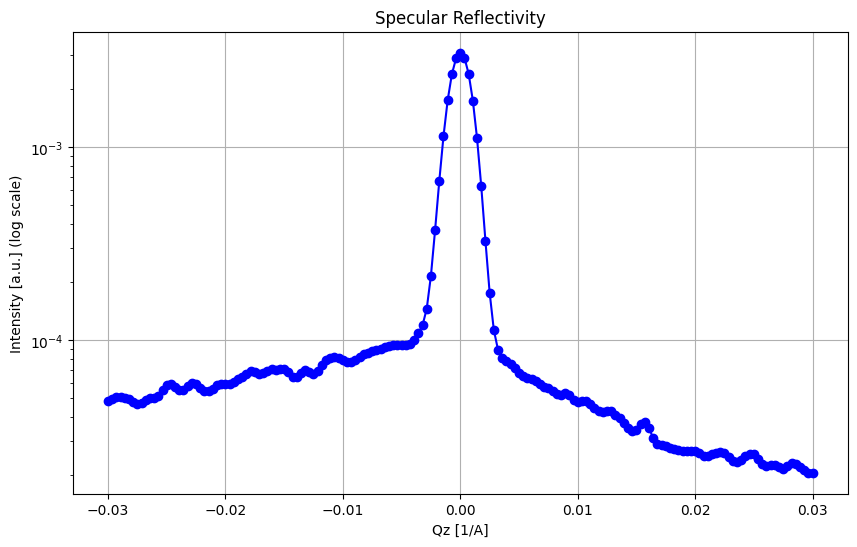

In [11]:




plt.figure(figsize=(10, 6))
plt.plot(Qz, I, marker='o', linestyle='-', color='blue')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.] (log scale)')
plt.title('Specular Reflectivity')
plt.grid(True)
plt.show()


<ipython-input-12-c3792c4e762c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=Qz, y=I, ci=None)


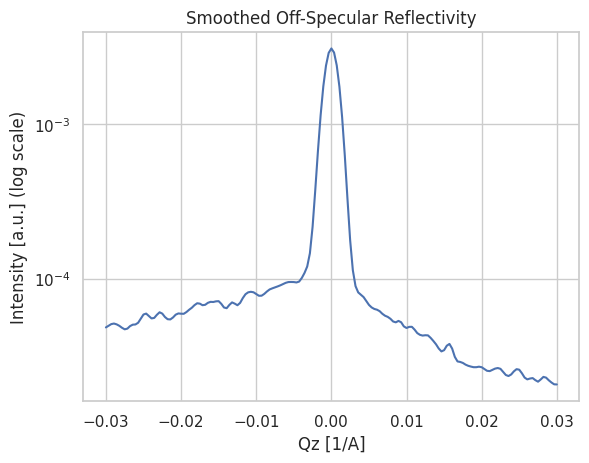

In [12]:
import seaborn as sns



# Set the style of seaborn
sns.set(style="whitegrid")

sns.lineplot(x=Qz, y=I, ci=None)
plt.yscale('log')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.] (log scale)')
plt.title('Smoothed Off-Specular Reflectivity')
plt.show()


In [13]:
# Interactive Specular Reflectivity Plot
import plotly.express as px

fig = px.scatter(x=Qz, y=I, log_y=True, labels={'x': 'Qz [1/A]', 'I[a.u.]': 'Intensity [a.u.]'})
fig.update_layout(title='Interactive Specular Reflectivity Plot')
fig.show()




<Axes: >

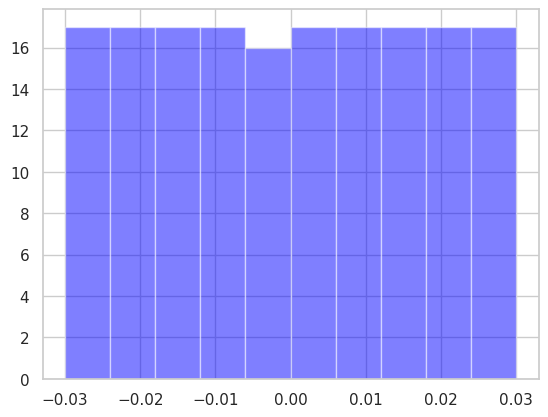

In [14]:
Qz.hist(color='blue', alpha=0.5)

<Axes: >

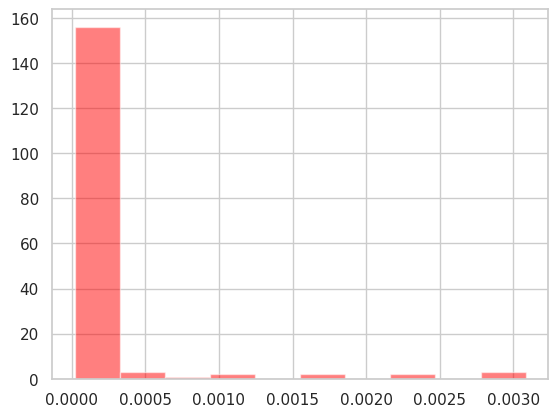

In [15]:
I.hist(color='red', alpha=0.5)

In [16]:
print(Qz.corr(I))
print(I.corr(Qz))

-0.026816928490802742
-0.026816928490802742


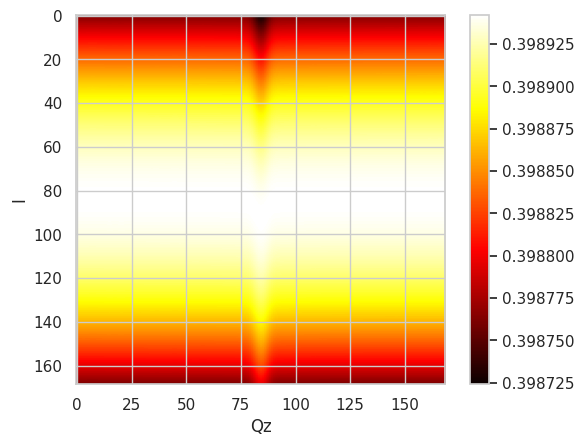

In [17]:
# Heatmap
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Extracting unique Qz and I values from the datasets
q_values = Qz.unique()
r_values = I.unique()

# Initializing a 2D array to hold the likelihood values
# The array dimensions are determined by the number of unique Qz and I values
likelihood = np.zeros((len(q_values), len(r_values)))

# Iterating over all unique Qz values
for i, q in enumerate(q_values):
  # Iterating over all unique I values
  for j, r in enumerate(r_values):
    # Calculating the likelihood of observing the I value (r) given Qz value (q)
    # Assuming a normal distribution centered at Qz (loc=q) with a standard deviation (scale) of 1
    likelihood[i, j] = norm.pdf(r, loc=q, scale=1)

# Visualizing the likelihood matrix as a heatmap
plt.imshow(likelihood, cmap='hot')  # 'hot' colormap to represent likelihood values
plt.xlabel("Qz")  # Label for the x-axis, representing unique Qz values
plt.ylabel("I")  # Label for the y-axis, representing unique I values
plt.colorbar()  # Adding a colorbar to indicate the scale of likelihood values
plt.show()  # Displaying the plot


<ipython-input-29-742e29952113>:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-29-742e29952113>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




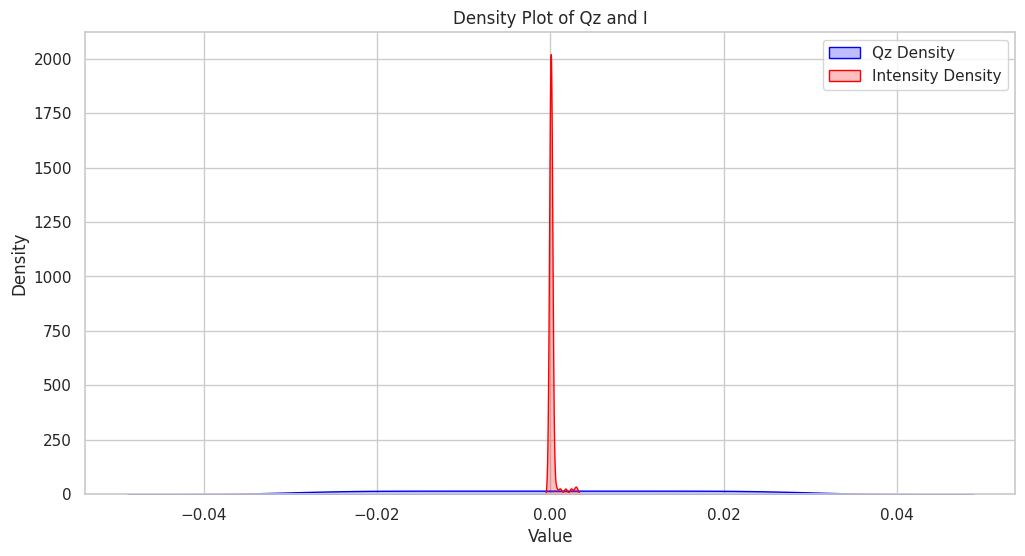

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt



# Set the style of seaborn
sns.set(style="whitegrid")

# Extracting unique Qz and I values from the datasets
q_values = Qz.unique()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the KDE for Qz
sns.kdeplot(Qz, color="blue", shade=True, label='Qz Density')

# Plot the KDE for I
sns.kdeplot(I, color="red", shade=True, label='Intensity Density')

# Adding labels
plt.title('Density Plot of Qz and I')
plt.xlabel('Value')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


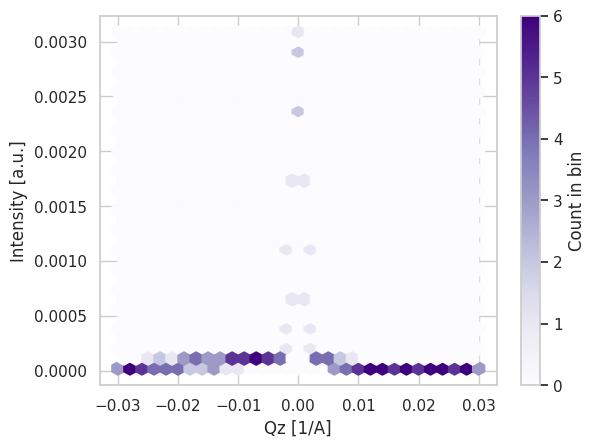

In [19]:
# Creating a hexagonal binning plot, which is a type of two-dimensional
# Histogram used to visualize the density of points in a scatter plot.
plt.hexbin(Qz, I, gridsize=30, cmap='Purples')
plt.colorbar(label='Count in bin')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.show()


<ipython-input-20-c9076025aabb>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




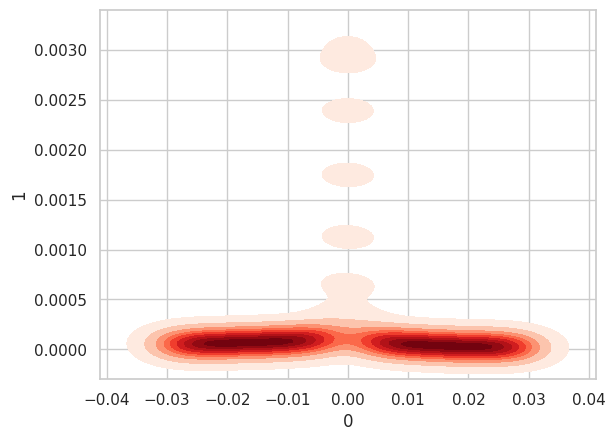

In [20]:
sns.kdeplot(x=Qz, y=I, cmap="Reds", shade=True, bw_adjust=0.5)
plt.show()


In [21]:
import plotly.express as px
fig = px.density_heatmap(x=Qz, y=I, nbinsx=30, nbinsy=30, color_continuous_scale='Purples')
fig.show()


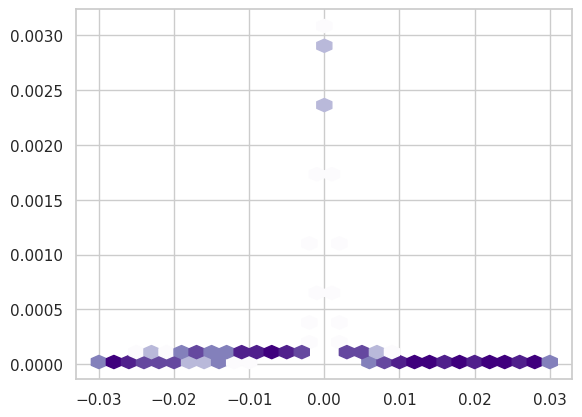

In [22]:
from matplotlib.colors import LogNorm
plt.hexbin(Qz, I, gridsize=30, cmap='Purples', norm=LogNorm())


In [23]:
# Divide the whole dataset with length to see the subset of dataset change.

first_half_Qz = Qz[:len(Qz)//2]
second_half_Qz = Qz[len(Qz)//2:]

first_half_intensity = I[:len(I)//2]
second_half_intensity = I[len(I)//2:]
print(first_half_Qz)
print(second_half_Qz)


0    -0.030000
1    -0.029643
2    -0.029286
3    -0.028929
4    -0.028571
        ...   
79   -0.001786
80   -0.001429
81   -0.001071
82   -0.000714
83   -0.000357
Name: 0, Length: 84, dtype: float64
84     0.000000
85     0.000357
86     0.000714
87     0.001071
88     0.001429
         ...   
164    0.028571
165    0.028929
166    0.029286
167    0.029643
168    0.030000
Name: 0, Length: 85, dtype: float64


In [24]:
# Determine the midpoint of the dataset
midpoint = len(Qz) // 2

# Create initial_phase subsets
initial_phase_Qz = Qz.iloc[:midpoint]
initial_phase_I = I.iloc[:midpoint]

# Create second_phase subsets
second_phase_Qz = Qz.iloc[midpoint:]
second_phase_I = I.iloc[midpoint:]


In [25]:
# Describe the initial phase
initial_phase_description = pd.DataFrame({'Qz': initial_phase_Qz, 'I': initial_phase_I}).describe()

# Describe the second phase
second_phase_description = pd.DataFrame({'Qz': second_phase_Qz, 'I': second_phase_I}).describe()

# Print the summaries
print("Initial Phase Summary:\n", initial_phase_description, "\n")
print("Second Phase Summary:\n", second_phase_description)


Initial Phase Summary:
               Qz          I
count  84.000000  84.000000
mean   -0.015179   0.000177
std     0.008712   0.000450
min    -0.030000   0.000047
25%    -0.022589   0.000058
50%    -0.015179   0.000069
75%    -0.007768   0.000087
max    -0.000357   0.002886 

Second Phase Summary:
               Qz          I
count  85.000000  85.000000
mean    0.015000   0.000181
std     0.008815   0.000555
min     0.000000   0.000021
25%     0.007500   0.000026
50%     0.015000   0.000035
75%     0.022500   0.000056
max     0.030000   0.003083


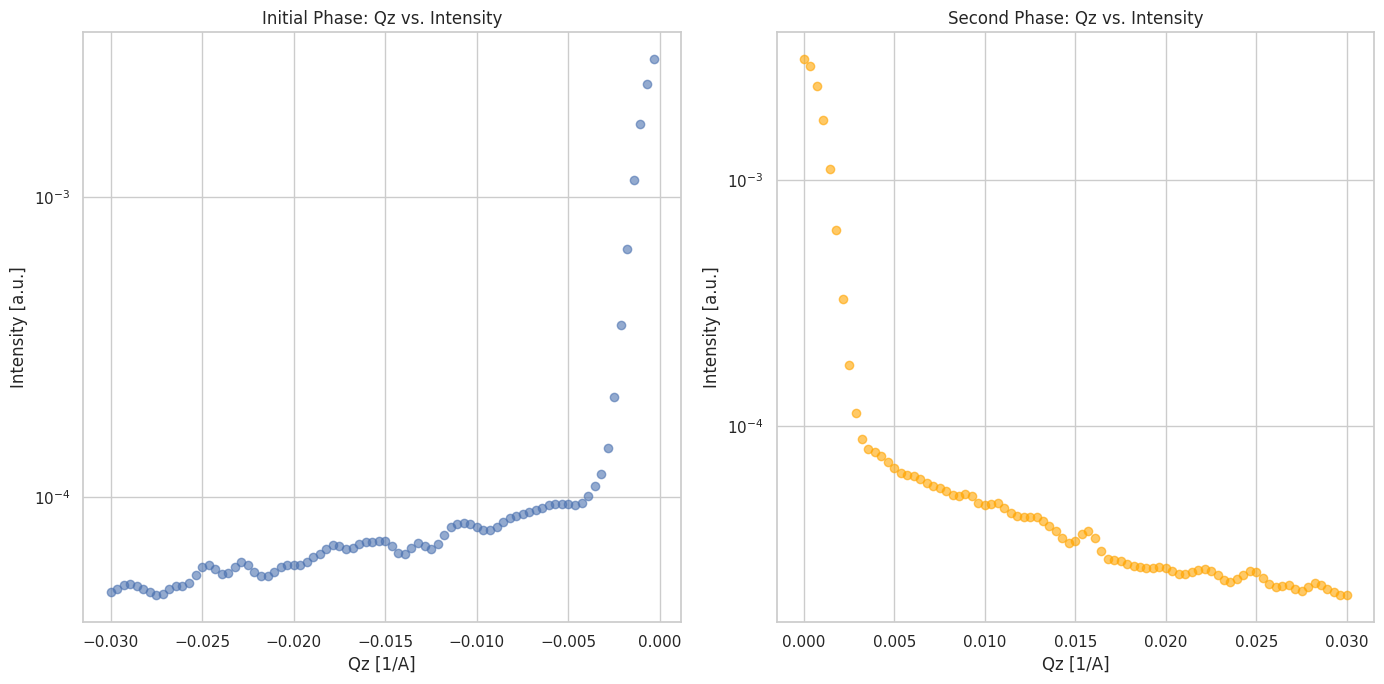

In [26]:
# Subplot for two phase
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")



# Plotting Qz vs. Intensity for each phase
plt.figure(figsize=(14, 7))

# Initial phase
plt.subplot(1, 2, 1)
# Assuming the DataFrame 'Qz' and 'I' have the same index and only one column
plt.scatter(initial_phase_Qz, initial_phase_I, alpha=0.6)
plt.title('Initial Phase: Qz vs. Intensity')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.yscale('log')  # Using a logarithmic scale for Intensity

# Second phase
plt.subplot(1, 2, 2)
# Assuming the DataFrame 'Qz' and 'I' have the same index and only one column
plt.scatter(second_phase_Qz, second_phase_I, alpha=0.6, color='orange')
plt.title('Second Phase: Qz vs. Intensity')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.yscale('log')  # Using a logarithmic scale for Intensity

plt.tight_layout()
plt.show()


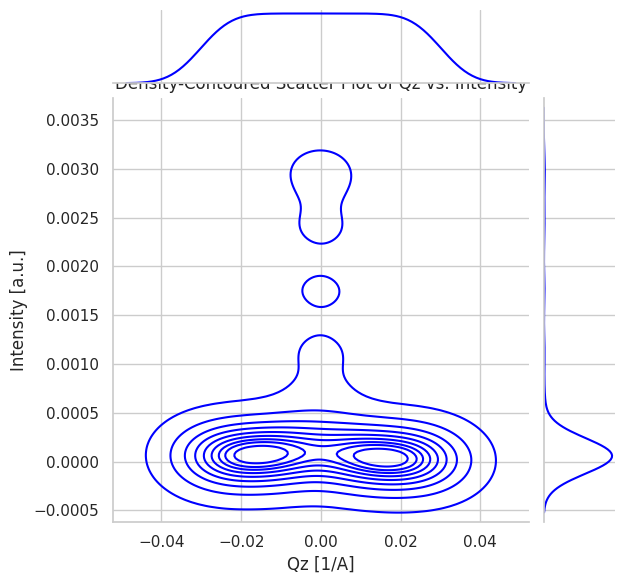

In [27]:
# prompt: plotting Qz vs I with a density-contoured scatter plot

sns.jointplot(x=Qz, y=I, kind='kde', color='blue')
plt.xlabel('Qz [1/A]')
plt.ylabel('Intensity [a.u.]')
plt.title('Density-Contoured Scatter Plot of Qz vs. Intensity')
plt.show()


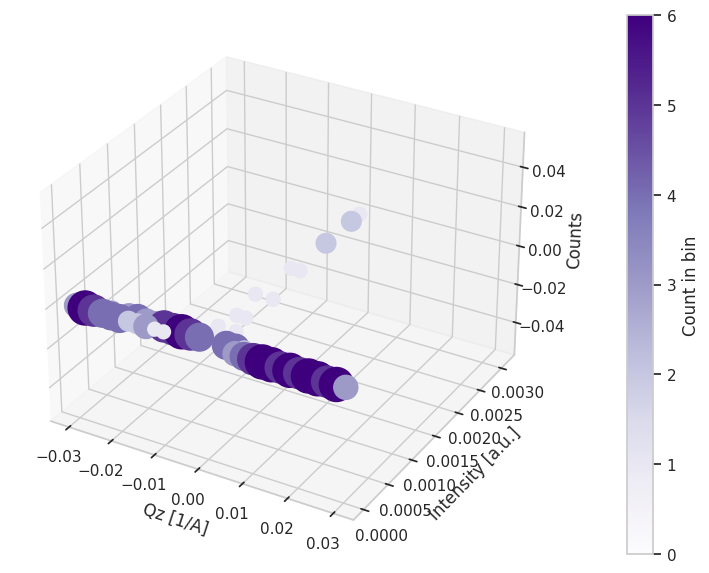

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
# First, perform a 2D hexbin to get the counts in each bin
fig, ax = plt.subplots()
hb = ax.hexbin(Qz, I, gridsize=30)
plt.close(fig)  # We don't need this plot, just the hexbin data

# Extract bin coordinates and counts
counts = hb.get_array()
verts = hb.get_offsets()

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use bin counts as the z value
z = np.zeros_like(counts)

# Use counts as the size of the scatter points, adjusting the scale as needed
sizes = counts * 100  # Scale factor to adjust the size of the scatter points

# Scatter plot where x, y are bin coordinates, z is zero, and point size represents bin count
sc = ax.scatter(verts[:, 0], verts[:, 1], z, s=sizes, c=counts, cmap='Purples', depthshade=False)

# Add a color bar to indicate the scale of counts
cb = plt.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Count in bin')

# Set labels
ax.set_xlabel('Qz [1/A]')
ax.set_ylabel('Intensity [a.u.]')
ax.set_zlabel('Counts')

# Show plot
plt.show()
